<a href="https://colab.research.google.com/github/sheelapravalika/AI_CS_sheelapravalika13gmail/blob/main/ANN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# ✅ STEP 1: Install Required Libraries (if not already installed)
!pip install -U datasets huggingface_hub fsspec pandas scikit-learn matplotlib seaborn numpy tensorflow

  Using cached fsspec-2025.7.0-py3-none-any.whl.metadata (12 kB)
  Using cached numpy-2.3.1-cp311-cp311-manylinux_2_28_x86_64.whl.metadata (62 kB)


In [ ]:
 #✅ STEP 2: Import Libraries
from datasets import load_dataset
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_auc_score
from sklearn.utils import class_weight

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization
from tensorflow.keras.callbacks import EarlyStopping

In [ ]:
# ✅ STEP 3: Load Dataset (CIC-IDS2017 - Binary)
dataset = load_dataset("sonnh-tech1/cic-ids-2017", "binary")
df = dataset["train"].to_pandas()
print(df)

         DestinationPort  FlowDuration  TotalFwdPackets  TotalBackwardPackets  \
0                  54865             3                2                     0   
1                  55054           109                1                     1   
2                  55055            52                1                     1   
3                  46236            34                1                     1   
4                  54863             3                2                     0   
...                  ...           ...              ...                   ...   
2522357               53         32215                4                     2   
2522358               53           324                2                     2   
2522359            58030            82                2                     1   
2522360               53       1048635                6                     2   
2522361               53         94939                4                     2   

         TotalLengthofFwdPa

In [ ]:
# ✅ STEP 4: Convert Multi-Class Labels to Binary: BENIGN (0), ATTACK (1)
df['Label'] = df['Label'].apply(lambda x: 0 if x == 'BENIGN' else 1)

In [ ]:
# ✅ STEP 5: Preprocessing
X = df.drop(['Label', 'LabelMap'], axis=1)
y = df['Label']

X_numeric = X.select_dtypes(include=['int64', 'float64'])

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_numeric)


In [ ]:
# ✅ STEP 6: Train/Test Split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=42)


In [ ]:
# ✅ STEP 7: Compute Class Weights for Imbalanced Data
class_weights = class_weight.compute_class_weight('balanced', classes=np.unique(y_train), y=y_train)
class_weights_dict = dict(enumerate(class_weights))

In [ ]:
# ✅ STEP 8: Build Deep ANN Model
model = Sequential([
    Dense(256, activation='relu', input_shape=(X_train.shape[1],)),
    BatchNormalization(),
    Dropout(0.5),

    Dense(128, activation='relu'),
    BatchNormalization(),
    Dropout(0.4),

    Dense(64, activation='relu'),
    Dropout(0.3),

    Dense(1, activation='sigmoid')  # Binary output
])

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [ ]:
# ✅ STEP 9: Train the ANN Model
early_stop = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

history = model.fit(
    X_train, y_train,
    validation_split=0.2,
    epochs=30,
    batch_size=512,
    class_weight=class_weights_dict,
    callbacks=[early_stop],
    verbose=1
)


Epoch 1/30
2759/2759 ━━━━━━━━━━━━━━━━━━━━ 48s 16ms/step - accuracy: 0.9337 - loss: 0.1402 - val_accuracy: 0.9685 - val_loss: 0.0640
Epoch 2/30
2759/2759 ━━━━━━━━━━━━━━━━━━━━ 42s 15ms/step - accuracy: 0.9605 - loss: 0.0750 - val_accuracy: 0.9709 - val_loss: 0.0566
Epoch 3/30
2759/2759 ━━━━━━━━━━━━━━━━━━━━ 41s 15ms/step - accuracy: 0.9638 - loss: 0.0674 - val_accuracy: 0.9694 - val_loss: 0.0575
Epoch 4/30
2759/2759 ━━━━━━━━━━━━━━━━━━━━ 81s 15ms/step - accuracy: 0.9658 - loss: 0.0629 - val_accuracy: 0.9686 - val_loss: 0.0537
Epoch 5/30
2759/2759 ━━━━━━━━━━━━━━━━━━━━ 40s 15ms/step - accuracy: 0.9670 - loss: 0.0605 - val_accuracy: 0.9724 - val_loss: 0.0514
Epoch 6/30
2759/2759 ━━━━━━━━━━━━━━━━━━━━ 40s 14ms/step - accuracy: 0.9690 - loss: 0.0575 - val_accuracy: 0.9655 - val_loss: 0.0626
Epoch 7/30
2759/2759 ━━━━━━━━━━━━━━━━━━━━ 43s 15ms/step - accuracy: 0.9703 - loss: 0.0559 - val_accuracy: 0.9695 - val_loss: 0.0563
Epoch 8/30
2759/2759 ━━━━━━━━━━━━━━━━━━━━ 94s 19ms/step - accuracy: 0.9711 -

In [ ]:
# ✅ STEP 10: Evaluate the Model
y_pred_prob = model.predict(X_test)
y_pred = (y_pred_prob > 0.5).astype("int32").flatten()


23648/23648 ━━━━━━━━━━━━━━━━━━━━ 34s 1ms/step


In [ ]:
# ✅ Metrics
print("✅ Accuracy:", accuracy_score(y_test, y_pred))
print("✅ ROC-AUC:", roc_auc_score(y_test, y_pred_prob))
print("\n📄 Classification Report:\n", classification_report(y_test, y_pred))
print("\n📊 Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

✅ Accuracy: 0.9906080144414828
✅ ROC-AUC: 0.9996810745526841

📄 Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.99      0.99    628642
           1       0.95      0.99      0.97    128067

    accuracy                           0.99    756709
   macro avg       0.98      0.99      0.98    756709
weighted avg       0.99      0.99      0.99    756709


📊 Confusion Matrix:
 [[622272   6370]
 [   737 127330]]


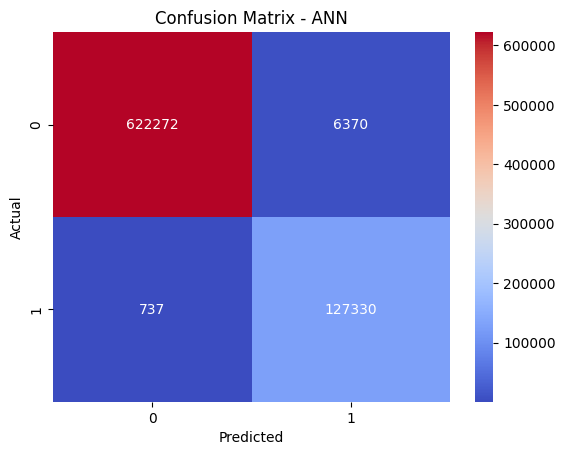

In [ ]:
# ✅ Confusion Matrix Heatmap
conf_mat = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_mat, annot=True, fmt='d', cmap='coolwarm')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix - ANN')
plt.show()

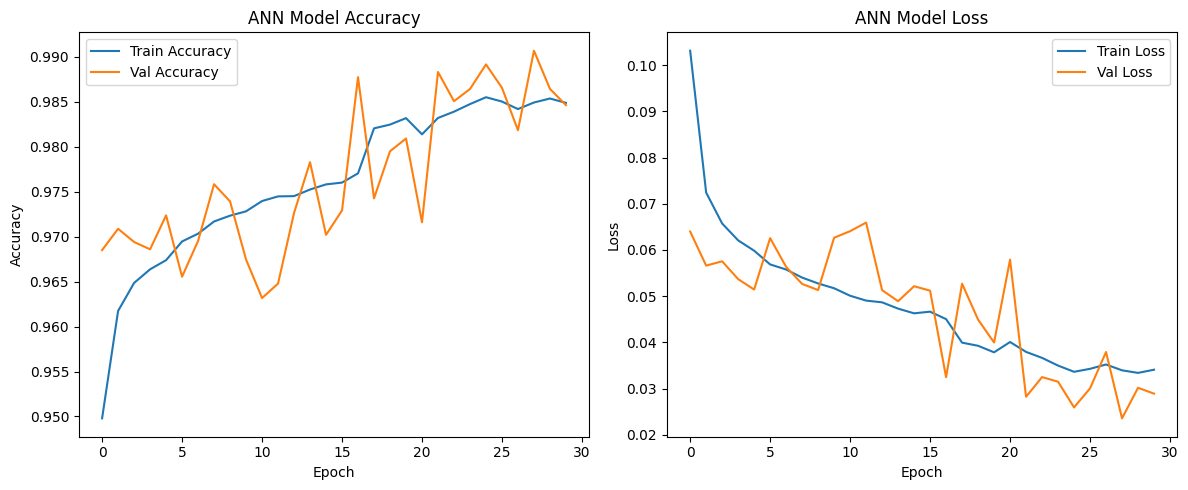

In [ ]:
# ✅ STEP 11: Plot Training History
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Val Accuracy')
plt.title('ANN Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.title('ANN Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()